   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0          

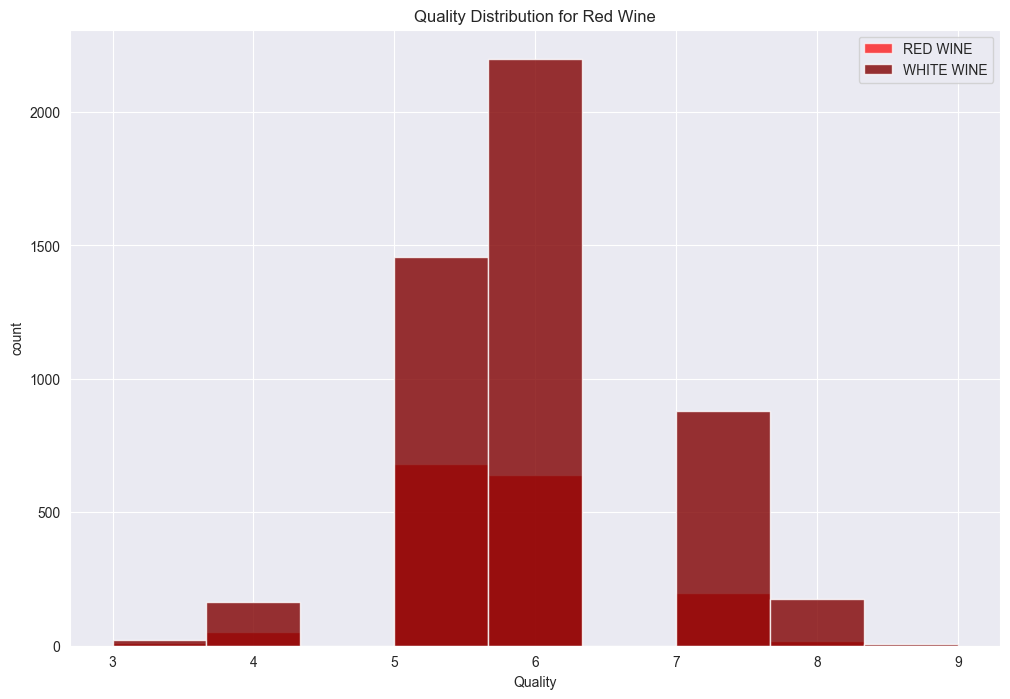

In [15]:
import pandas as pd
import numpy as np
import datasets
from sklearn.datasets import load_wine
wine_data = load_wine()
import matplotlib.pyplot as plt
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df["Target"] = wine_data.target
print(wine_df.head())
print(wine_data.feature_names)
print(wine_data.target_names)
red_wine = datasets.load_dataset("csv",data_files="winequality-red.csv",  delimiter=";")
white_wine = datasets.load_dataset("csv", data_files="winequality-white.csv", delimiter=";")
red_wine_df = red_wine["train"].to_pandas() #convert it to pandas dataframe
white_wine_df = white_wine["train"].to_pandas()
print(red_wine_df.shape) #print the shape
print(white_wine_df.shape)
print(red_wine_df.dtypes)
print(red_wine_df.describe())

#print number of unique values
print(red_wine_df.nunique())

#check for missing values
print(red_wine_df.isnull().sum())
plt.figure(figsize=(12,8))
#find the minimum quality column between red_wine and white_Wine
min_quality = min(red_wine_df["quality"].min(), white_wine_df["quality"].min())
max_quality = max(red_wine_df["quality"].max(), white_wine_df["quality"].max())
#create an array of 10 evenly spaces values starting from min to  max
bin_space = np.linspace(min_quality, max_quality,10)
#plot hist
plt.hist(red_wine_df.quality, bins=bin_space, color="red", alpha=0.7, label="RED WINE")
plt.hist(white_wine_df.quality, bins=bin_space, color="maroon", alpha=0.8, label="WHITE WINE")
plt.xlabel("Quality")
plt.ylabel("count")
plt.title("Quality Distribution for Red Wine")
plt.legend()
plt.show()

